# DVH reconstruction from 3D dose grid

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from io import StringIO

%matplotlib inline

We would make DVH from 3D dose grid and exported structure bitmap.

In [3]:
# where 3D dose and bitmaps are
path2dosedata = Path("D:/XCSW/Xciser/Bin/X64/Release/Export/QA_XCISION-DM_Baseline_1_201808151011")

d3d       = path2dosedata / "XCISION-DM_Baseline_1_PatientKdd.3ddose"
ROIbitmap = path2dosedata / "XCISION-DM_Baseline_1_____3.bitmap"
print("Looking to make DVH using \nd3d: {0}\n                     with \nbitmap: {1}".format(d3d, ROIbitmap))

Looking to make DVH using 
d3d: D:\XCSW\Xciser\Bin\X64\Release\Export\QA_XCISION-DM_Baseline_1_201808151011\XCISION-DM_Baseline_1_PatientKdd.3ddose
                     with 
bitmap: D:\XCSW\Xciser\Bin\X64\Release\Export\QA_XCISION-DM_Baseline_1_201808151011\XCISION-DM_Baseline_1_____3.bitmap


## Helper code to load 3DDose and bitmap

In [4]:
def get_dimensions(line):
    """
    Parse and extract X, Y and Z dimensions from string
    :param line: line contains x, y, z dimensions
    :returns: tuple
    """
    split = line.split(" ")
    split = [x for x in split if x] # remove empty lines

    nx = int(split[0])
    ny = int(split[1])
    nz = int(split[2])

    return (nx, ny, nz)


def get_boundaries(n, line):
    """
    Parse and extract X, Y and Z boundaries from string
    :param n: number of bins (boundaries are one more)
    :param line: line contains boundaries data
    :returns: array of parsed boundaries
    """
    split = line.split(" ")
    split = [x for x in split if x]  # remove empty lines

    boundaries = np.empty(n+1, dtype = np.float32)

    for k in range(0, n+1):
        d = np.float32(split[k])
        boundaries[k] = d

    return boundaries


def get_3ddata(nx, ny, nz, line):
    """
    Read a line and convert it to 3D dose representation
    :param nx: nof X points
    :param ny: nof Y points
    :param nz: nof Z points
    :param line" string which contains all 3D dose data points
    :returns: 3D dose data as NumPy object
    """
    split = line.split(" ")
    split = [x for x in split if x]  # remove empty lines

    data = np.empty((nx, ny, nz), dtype = np.float32)

    k = 0
    for iz in range(0, nz):
        for iy in range(0, ny):
            for ix in range(0, nx):
                data[ix,iy,iz] = float(split[k])
                k += 1

    return data

### Reading 3d dose data

In [5]:
f = open(d3d, 'r')

#read in the dimensions
line = f.readline()
(nx, ny, nz) = get_dimensions(line)
print(nx, ny, nz)

line = f.readline()
bx = get_boundaries(nx, line)
print(bx)

line = f.readline()
by = get_boundaries(ny, line)
print(by)

line = f.readline()
bz = get_boundaries(nz, line)
print(bz)

lines = f.readlines()
sb = StringIO()
for line in lines:
    sb.write(line)
    
dose = get_3ddata(nx, ny, nz, sb.getvalue())
print(dose.shape)

f.close()

512 512 168
[-5.32227e-02  5.32227e-02  1.59668e-01  2.66113e-01  3.72559e-01
  4.79004e-01  5.85449e-01  6.91895e-01  7.98340e-01  9.04785e-01
  1.01123e+00  1.11768e+00  1.22412e+00  1.33057e+00  1.43701e+00
  1.54346e+00  1.64990e+00  1.75635e+00  1.86279e+00  1.96924e+00
  2.07568e+00  2.18213e+00  2.28857e+00  2.39502e+00  2.50146e+00
  2.60791e+00  2.71436e+00  2.82080e+00  2.92725e+00  3.03369e+00
  3.14014e+00  3.24658e+00  3.35303e+00  3.45947e+00  3.56592e+00
  3.67236e+00  3.77881e+00  3.88525e+00  3.99170e+00  4.09814e+00
  4.20459e+00  4.31104e+00  4.41748e+00  4.52393e+00  4.63037e+00
  4.73682e+00  4.84326e+00  4.94971e+00  5.05615e+00  5.16260e+00
  5.26904e+00  5.37549e+00  5.48193e+00  5.58838e+00  5.69482e+00
  5.80127e+00  5.90771e+00  6.01416e+00  6.12061e+00  6.22705e+00
  6.33350e+00  6.43994e+00  6.54639e+00  6.65283e+00  6.75928e+00
  6.86572e+00  6.97217e+00  7.07861e+00  7.18506e+00  7.29150e+00
  7.39795e+00  7.50439e+00  7.61084e+00  7.71729e+00  7.82373e+0

### Reading bitmap data

In [6]:
f = open(ROIbitmap, 'r')

#read in the dimensions
line = f.readline()
(nbx, nby, nbz) = get_dimensions(line)
print(nbx, nby, nbz)

line = f.readline()
bbx = get_boundaries(nbx, line)
print(bbx)

line = f.readline()
bby = get_boundaries(nby, line)
print(bby)

line = f.readline()
bbz = get_boundaries(nbz, line)
print(bbz)

lines = f.readlines()
sb = StringIO()
for line in lines:
    sb.write(line)
    
bitmap = get_3ddata(nbx, nby, nbz, sb.getvalue())
print(bitmap.shape)

f.close()

512 512 168
[-5.3222656e-02  5.3222656e-02  1.5966797e-01  2.6611328e-01
  3.7255859e-01  4.7900391e-01  5.8544922e-01  6.9189453e-01
  7.9833984e-01  9.0478516e-01  1.0112305e+00  1.1176758e+00
  1.2241211e+00  1.3305664e+00  1.4370117e+00  1.5434570e+00
  1.6499023e+00  1.7563477e+00  1.8627930e+00  1.9692383e+00
  2.0756836e+00  2.1821289e+00  2.2885742e+00  2.3950195e+00
  2.5014648e+00  2.6079102e+00  2.7143555e+00  2.8208008e+00
  2.9272461e+00  3.0336914e+00  3.1401367e+00  3.2465820e+00
  3.3530273e+00  3.4594727e+00  3.5659180e+00  3.6723633e+00
  3.7788086e+00  3.8852539e+00  3.9916992e+00  4.0981445e+00
  4.2045898e+00  4.3110352e+00  4.4174805e+00  4.5239258e+00
  4.6303711e+00  4.7368164e+00  4.8432617e+00  4.9497070e+00
  5.0561523e+00  5.1625977e+00  5.2690430e+00  5.3754883e+00
  5.4819336e+00  5.5883789e+00  5.6948242e+00  5.8012695e+00
  5.9077148e+00  6.0141602e+00  6.1206055e+00  6.2270508e+00
  6.3334961e+00  6.4399414e+00  6.5463867e+00  6.6528320e+00
  6.7592773e

## Building DVH

### First, lets find dmax

In [7]:
dmax = np.amax(dose)
print(dmax)

bmax = np.amax(bitmap)
print(bmax)
bsum = np.sum(bitmap)
print(bsum)

10.9196
1.0
1375887.0


### Now make histogram

In [8]:
nitems = int(bsum + 0.5)
print(nitems)

droi = dose[np.array(bitmap, dtype=bool)]

1375887


In [9]:
print(droi)                
print(len(droi))

[1.16558 1.16335 1.16335 ... 1.17091 1.16243 1.16142]
1375887


In [10]:
hist, bins = np.histogram(droi, bins = 200, range=(0.0, dmax))
print(hist)
print(bins)

[    0     0     0     0     0     7    93   169   317   488   615   781
   899  1091  1295  1431  1722  1968  2213  3293  7171 13042 16092 18034
 19149 20158 21132 21219 22257 22604 22751 22985 22877 22581 21350 20134
 19394 18489 17723 16701 16094 15316 14429 13721 13177 13188 12493 11866
 11308 11105 10710 10703  9994  9740  9777  9282  9174  9243  8823  8300
  8079  7864  7887  7903  7497  7536  7708  7321  7250  6933  6926  7122
  6971  6925  6773  6740  7063  6743  6573  6556  6798  6432  6322  5986
  6415  6114  6449  5921  5678  5795  5655  5513  5484  5452  5624  5521
  5317  5274  4944  5078  5229  5085  4778  5053  4950  5029  4730  4520
  4759  4721  4586  4401  4433  4387  4621  4617  4111  4325  4161  4104
  4220  4185  4039  4015  4181  4113  4102  3881  4111  4113  4157  3819
  3765  3629  3736  3936  3929  3744  3637  3895  3981  3876  3758  3780
  3700  3592  3926  3795  3434  3595  3682  3786  3740  3630  3805  3848
  3977  4035  4109  3879  3756  3685  4101  3983  4

In [11]:
dvh = np.flip(np.cumsum(np.flip(hist)))
print(dvh)

[1375887 1375887 1375887 1375887 1375887 1375887 1375880 1375787 1375618
 1375301 1374813 1374198 1373417 1372518 1371427 1370132 1368701 1366979
 1365011 1362798 1359505 1352334 1339292 1323200 1305166 1286017 1265859
 1244727 1223508 1201251 1178647 1155896 1132911 1110034 1087453 1066103
 1045969 1026575 1008086  990363  973662  957568  942252  927823  914102
  900925  887737  875244  863378  852070  840965  830255  819552  809558
  799818  790041  780759  771585  762342  753519  745219  737140  729276
  721389  713486  705989  698453  690745  683424  676174  669241  662315
  655193  648222  641297  634524  627784  620721  613978  607405  600849
  594051  587619  581297  575311  568896  562782  556333  550412  544734
  538939  533284  527771  522287  516835  511211  505690  500373  495099
  490155  485077  479848  474763  469985  464932  459982  454953  450223
  445703  440944  436223  431637  427236  422803  418416  413795  409178
  405067  400742  396581  392477  388257  384072  3

### Normalization

In [12]:
dvh = dvh / np.float32(nitems) * np.float32(1.0)
print(dvh)

[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 9.99994912e-01 9.99927320e-01
 9.99804490e-01 9.99574093e-01 9.99219413e-01 9.98772428e-01
 9.98204794e-01 9.97551398e-01 9.96758455e-01 9.95817244e-01
 9.94777187e-01 9.93525631e-01 9.92095281e-01 9.90486864e-01
 9.88093499e-01 9.82881588e-01 9.73402612e-01 9.61706884e-01
 9.48599703e-01 9.34682136e-01 9.20031223e-01 9.04672404e-01
 8.89250353e-01 8.73073879e-01 8.56645204e-01 8.40109689e-01
 8.23404102e-01 8.06777010e-01 7.90365052e-01 7.74847789e-01
 7.60214320e-01 7.46118686e-01 7.32680809e-01 7.19799664e-01
 7.07661312e-01 6.95964131e-01 6.84832403e-01 6.74345350e-01
 6.64372874e-01 6.54795779e-01 6.45210690e-01 6.36130729e-01
 6.27506474e-01 6.19287776e-01 6.11216619e-01 6.03432549e-01
 5.95653567e-01 5.88389890e-01 5.81310820e-01 5.74204858e-01
 5.67458665e-01 5.60790966e-01 5.54073118e-01 5.47660527e-01
 5.41628055e-01 5.35756207e-01 5.30040621e-01 5.24308319e-01
 5.18564388e-01 5.131155

<BarContainer object of 200 artists>

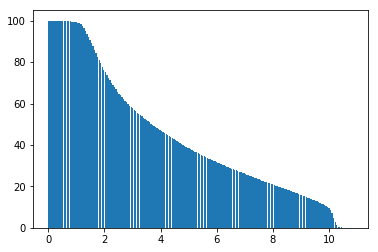

In [26]:
width = 0.90 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, dvh, align='center', width = width)

In [13]:
for k in range(len(dvh)):
    print(" {0}     {1}     {2}".format(bins[k], bins[k+1], dvh[k]))

 0.0     0.054597996175289154     1.0
 0.054597996175289154     0.10919599235057831     1.0
 0.10919599235057831     0.16379399597644806     1.0
 0.16379399597644806     0.21839198470115662     1.0
 0.21839198470115662     0.27298998832702637     1.0
 0.27298998832702637     0.3275879919528961     1.0
 0.3275879919528961     0.38218599557876587     0.9999949123728911
 0.38218599557876587     0.43678396940231323     0.9999273196127298
 0.43678396940231323     0.491381973028183     0.9998044897582432
 0.491381973028183     0.5459799766540527     0.9995740929305967
 0.5459799766540527     0.6005779504776001     0.9992194126407183
 0.6005779504776001     0.6551759839057922     0.9987724282590067
 0.6551759839057922     0.7097739577293396     0.9982047944344267
 0.7097739577293396     0.7643719911575317     0.9975513977528678
 0.7643719911575317     0.8189699649810791     0.9967584547277502
 0.8189699649810791     0.8735679388046265     0.9958172437126014
 0.8735679388046265     0.928165972